In [3]:
using Pkg
Pkg.activate("..") ## because we have environment files in the parent directory
Pkg.instantiate() ## to download all missing packages


  Activating project at `c:\Users\piotr\Dropbox\WNE\QuantEcon_all\QEcon2023\Code`

In [4]:
# load some packages we will need today
using Plots, Calculus, Optim, ForwardDiff

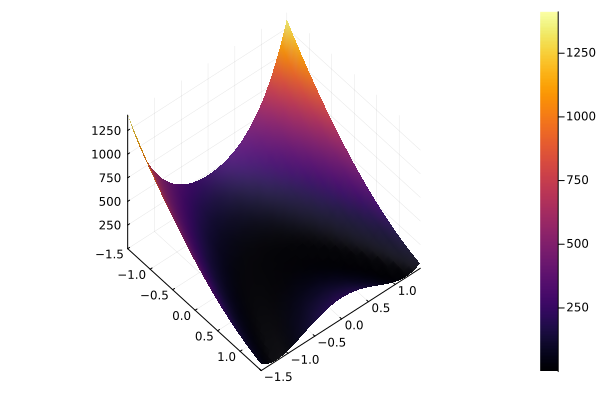

In [7]:
# test function

rosenbrock(x) = (1.0 .- x[1]).^2 .+ 100.0 .* (x[1] .- x[2].^2).^2

grid = collect(-1.5:0.11:1.5);  # grid spacing is important!



# plot it to see what happens
plot(grid,grid,(x,y)->rosenbrock([x, y]),st=:surface,camera=(50,50))

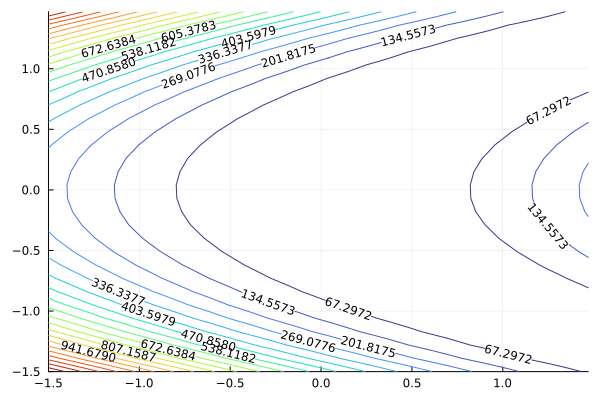

In [8]:
plot(grid,grid,(x,y)->rosenbrock([x, y]),st=:contour,color=:turbo, levels = 20,clabels=true, cbar=false, lw=1)

In [9]:

function plot_optim(res, start, x,y,ix; offset = 0)
	contour(x, y, (x,y)->sqrt(rosenbrock([x, y])), fill=false, 	color=:turbo, legend=false, levels = 50)
    xtracemat = hcat(Optim.x_trace(res)...)
    plot!(xtracemat[1, (offset+1):ix], xtracemat[2, (offset+1):ix], mc = :white, lab="")
    scatter!(xtracemat[1:1,2:ix], xtracemat[2:2,2:ix], mc=:black, msc=:red, lab="")
    scatter!([1.], [1.], mc=:blue, msc=:blue,markersize = 8, lab="minimum")
    scatter!([start[1]], [start[2]], mc=:yellow, msc=:black, label="start", legend=true)
    scatter!([Optim.minimizer(res)[1]], [Optim.minimizer(res)[2]], mc=:black, msc=:black, label="last", legend=true)

end

plot_optim (generic function with 1 method)

In [22]:
x0 = [1.0, 0.5]
res_descent = optimize(rosenbrock, x0, GradientDescent(), Optim.Options(store_trace=true, extended_trace=true, iterations = 5000))

 * Status: success

 * Candidate solution
    Final objective value:     8.757659e-17

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.27e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.27e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.42e-20 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.19e-04 ≰ 0.0e+00
    |g(x)|                 = 1.00e-08 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3902
    f(x) calls:    9765
    ∇f(x) calls:   9765


"Gradient Descent"

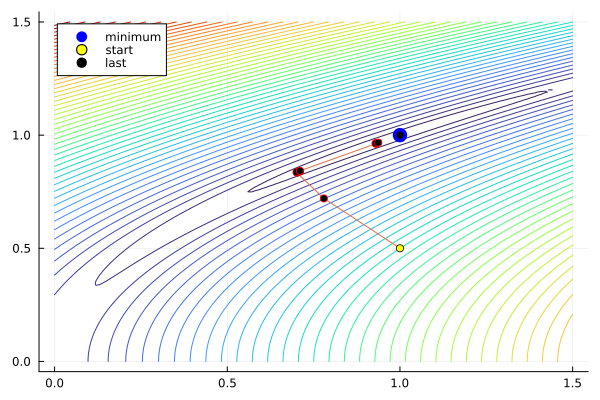

In [33]:
plot_optim(res_descent, x0, -0:0.01:1.5, -0:0.01:1.5,10)

In [31]:
x0 = [1.0, 0.5]
res_newton = optimize(rosenbrock, x0, Newton(), Optim.Options(store_trace=true, extended_trace=true, iterations = 5000))


 * Status: success

 * Candidate solution
    Final objective value:     1.355314e-17

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 2.14e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.14e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.57e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.16e+06 ≰ 0.0e+00
    |g(x)|                 = 7.88e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    9
    f(x) calls:    34
    ∇f(x) calls:   34
    ∇²f(x) calls:  9


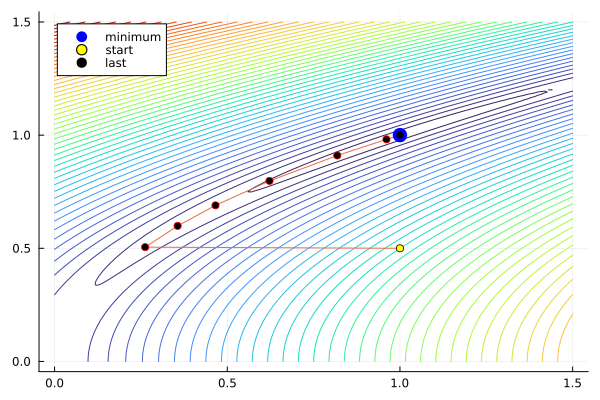

In [32]:
plot_optim(res_newton, x0, -0:0.01:1.5, -0:0.01:1.5,10)

In [39]:
res_bfgs = optimize(rosenbrock, x0, BFGS(), Optim.Options(store_trace=true, extended_trace=true, iterations = 20000))

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.222905e-18

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.44e-16 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.44e-16 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.82e-25 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.03e-07 ≰ 0.0e+00
    |g(x)|                 = 1.46e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    20000
    f(x) calls:    1035448
    ∇f(x) calls:   1035448


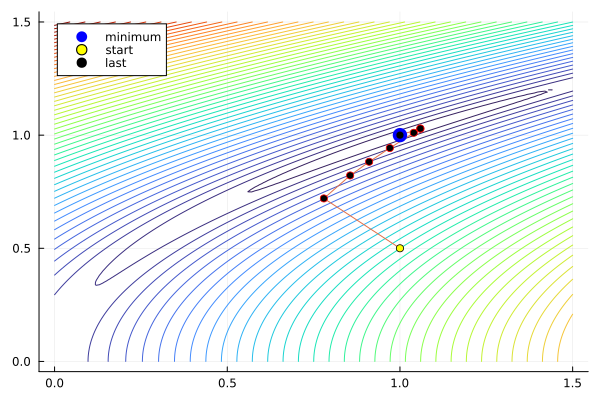

In [38]:
plot_optim(res_bfgs, x0, -0:0.01:1.5, -0:0.01:1.5,1000)

In [43]:
# beware!
res_stupid = optimize(rosenbrock, x0, BFGS(), Optim.Options(store_trace=true, extended_trace=true,iterations = 10,g_tol = 1e-1, show_trace = true ))

Iter     Function value   Gradient norm 
     0     5.625000e+01     1.500000e+02
 * Current step size: 1.0
 * time: 0.0


 * g(x): [149.9999999994262, -149.99999999297253]


 * ~inv(H): [1.0 0.0; 0.0 1.0]
 * x: [1.0, 0.5]


     1     6.854731e+00     7.516594e+01
 * Current step size: 0.0014686145558671568
 * time: 0.5850000381469727
 * g(x): [51.73681307295837, -75.16594303871258]
 * ~inv(H): [0.37508037306648034 0.4895672120261294; 0.4895672120261293 0.6457852028696139]
 * x: [0.7797078166207692, 0.7202921833697529]


     2     3.273799e+00     5.929251e+01
 * Current step size: 0.004375528082705388
 * time: 0.6150000095367432
 * g(x): [35.78382815377817, -59.292508501796604]
 * ~inv(H): [0.08000444103106 0.08519987212323749; 0.08519987212323737 0.09202537786900744]
 * x: [0.8558127680866505, 0.821858719610312]


     3     1.758204e+00     4.669088e+01
 * Current step size: 0.025109587549695275
 * time: 0.6150000095367432
 * g(x): [26.280892691915568, -46.69087529277392]
 * ~inv(H): [0.0242379335182907 0.02263933635722413; 0.022639336357224017 0.021869780114459714]
 * x: [0.9107738630028482, 0.8823135146726124]


     4     6.616581e-01     3.066439e+01
 * Current step size: 0.14255633189795477
 * time: 0.6150000095367432
 * g(x): [16.199195036003008, -30.664387620539976]
 * ~inv(H): [0.015621545967549045 0.013563379338257442; 0.01356337933825732 0.012322752856123685]
 * x: [0.9706554913984942, 0.9430620717285024]


     5     3.790530e-02     7.700843e+00
 * Current step size: 0.4259925866356037
 * time: 0.6449999809265137
 * g(x): [3.8907215158022255, -7.700842993915926]
 * ~inv(H): [0.010702115193258123 0.008757457117215612; 0.008757457117215496 0.007627885698674497]
 * x: [1.0400310472590653, 1.0104344363452609]


     6     3.583261e-03     3.953525e-01
 * Current step size: 0.7384680185406111
 * time: 0.6600000858306885
 * g(x): [0.31033865758636536, -0.39535251677716526]
 * ~inv(H): [0.008658671889405292 0.006851622754336547; 0.006851622754336431 0.005851516832555249]
 * x: [1.0590841516360758, 1.0286512041817224]


     7     3.497593e-03     1.254169e-01
 * Current step size: 2.546541492899351
 * time: 0.6610000133514404
 * g(x): [0.125416857683358, -0.01469203114852033]


 * ~inv(H): [0.008045333373235833 0.004053431060080325; 0.00405343106008021 0.003220708318445332]
 * x: [1.0591393751436697, 1.0291276328068772]


     8     7.902049e-05     2.647559e-01
 * Current step size: 56.01172021973129
 * time: 0.692000150680542
 * g(x): [-0.1200259318642117, 0.2647559181775901]
 * ~inv(H): [0.4922425413264173 0.24203464773492578; 0.24203464773492564 0.12017073151982918]
 * x: [1.0059580786419215, 1.0033034381918886]


     9     2.764147e-08     1.413129e-03
 * Current step size: 1.2245397679939307
 * time: 0.7070000171661377
 * g(x): [0.0003817109049513098, -0.001413128646551648]
 * ~inv(H): [0.5253899965931552 0.2606670843017621; 0.2606670843017619 0.1306415890417855]
 * x: [0.9998375402991738, 0.9999170001293312]


 * Status: success

 * Candidate solution
    Final objective value:     2.764147e-08

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.12e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.12e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.90e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.86e+03 ≰ 0.0e+00
    |g(x)|                 = 1.41e-03 ≤ 1.0e-01

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    9
    f(x) calls:    38
    ∇f(x) calls:   38


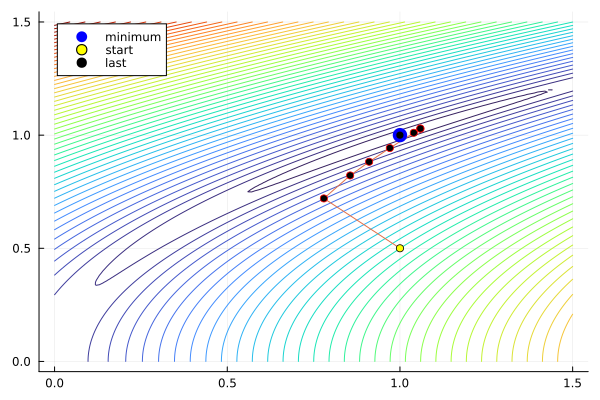

In [45]:
plot_optim(res_stupid, x0, -0:0.01:1.5, -0:0.01:1.5,8)

In [46]:
res_mm = optimize(rosenbrock, x0, NelderMead(), Optim.Options(iterations = 10, show_trace = true ))

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     1.595004e+01     6.196883e+01
 * time: 0.0


     1     1.595004e+01     2.305004e+01


 * time: 0.020999908447265625


     2     1.853789e+00     6.002575e+00
 * time: 0.03699994087219238


     3     1.853789e+00     1.737961e+00
 * time: 0.037999868392944336


     4     1.380427e+00     3.342529e-01
 * time: 0.037999868392944336


     5     1.038568e+00     5.054536e-01
 * time: 0.053999900817871094


     6     1.789521e-01     3.609581e-01
 * time: 0.0690000057220459


     7     1.789521e-01     1.025280e-01
 * time: 0.06999993324279785


     8     1.789521e-01     5.695894e-02
 * time: 0.08999991416931152


     9     1.789521e-01     5.067560e-02
 * time: 0.10500001907348633


    10     1.344660e-01     1.854780e-02
 * time: 0.10500001907348633


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.236444e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10
    f(x) calls:    23


In [ ]:
# enable automatic differentiation --- compare with the previous results
res_newton_AD = optimize(rosenbrock, x0, Newton(), Optim.Options(store_trace=true, extended_trace=true, iterations = 5000); autodiff = :forward)


In [47]:
# simulated annealing --- run several times!!!
res_sa = optimize(rosenbrock, x0, SimulatedAnnealing(), Optim.Options(store_trace=true, extended_trace=true, iterations = 100000))


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     6.886678e-05

 * Found with
    Algorithm:     Simulated Annealing

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    100000
    f(x) calls:    100001


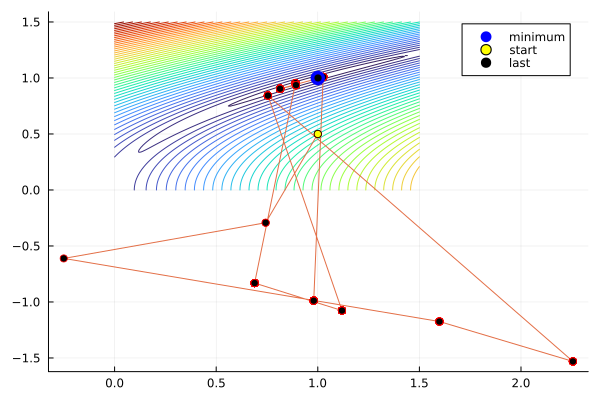

In [50]:
plot_optim(res_sa, x0, -0:0.01:1.5, -0:0.01:1.5,9000)